<a href="https://colab.research.google.com/github/quoctrungsz27/week9_AI/blob/main/week9_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)


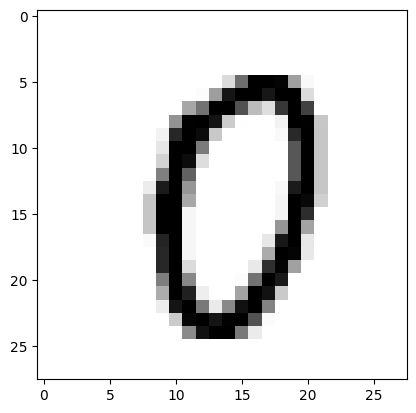

So : 0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
digit = train_images[1000]
plt.imshow(digit,cmap = plt.cm.binary)
plt.show()
print("So :",train_labels[1000])



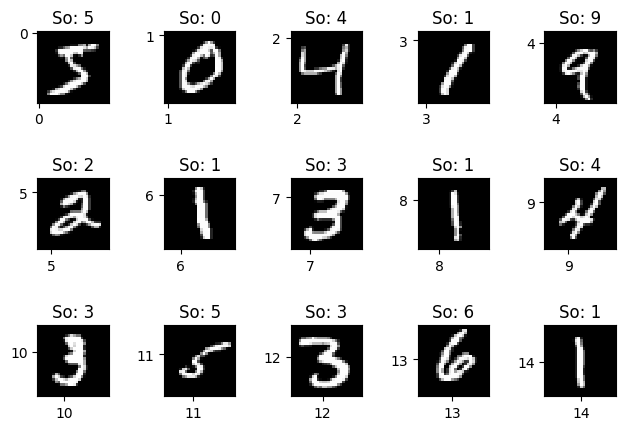

In [ ]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap = 'gray',interpolation='none')
  plt.title('So: {}'.format(train_labels[i]))
  plt.xticks([i])
  plt.yticks([i])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512,activation = 'relu',input_shape = (28*28,)))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = test_images
y = test_labels

train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images.reshape(10000,28*28)
tets_images = test_images.astype('float32')/255
print(train_images.shape)
print(test_images.shape)


(60000, 784)
(10000, 784)


In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [ ]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10, batch_size =128)
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Mất mát trên tập kiểm tra; ',test_loss)
print('Độ chính xác trên tập kiểm tra: ',test_acc)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2610 - accuracy: 0.9248
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1075 - accuracy: 0.9680
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0707 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0516 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0378 - accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0291 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0216 - accuracy: 0.9941
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0165 - accuracy: 0.9955
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0126 - accuracy: 0.9969
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 13.1065 - accuracy:

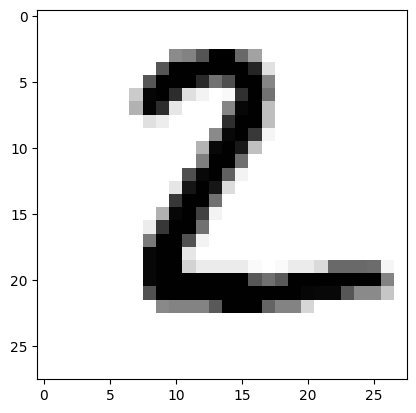

So : 2


In [ ]:
v1 = x[1]
plt.imshow(v1,cmap = plt.cm.binary)
plt.show()
print("So :",y[1])

In [ ]:
x_pred =x[1].reshape(1,28*28)
x_pred = x_pred.astype('float32')/255
                                        #kiểm tra  xem đúng khôngkhông
y_pred = model.predict(x_pred)
#print(y_pred)

1/1 [==============================] - 0s 32ms/step


In [ ]:
import numpy as np
#kiểm tratra
np.argmax(model.predict(x_pred),axis = 1)

1/1 [==============================] - 0s 22ms/step


array([2])